## Model trainging

I shall use Random forest Regressors.


In [13]:
# import sklearn for the ensembling of the data and prediciotn making
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import VarianceThreshold

In [2]:
# improting our data from data_analysis.ipynb 
data = pd.read_csv('fingerprinted_data.csv')

#dropping unnecessary columns
ml_data= data.drop(['molecule_chembl_id'], axis=1)
ml_data.head()

,Unnamed: 0,bioactivity,MW,LogP,NumHDonors,NumHAcceptors,pIC50,FP_Bit_0,FP_Bit_1,FP_Bit_2,...,FP_Bit_2038,FP_Bit_2039,FP_Bit_2040,FP_Bit_2041,FP_Bit_2042,FP_Bit_2043,FP_Bit_2044,FP_Bit_2045,FP_Bit_2046,FP_Bit_2047
0,0,active,576.742,5.28050,1,8,6.892790,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,active,562.715,5.03450,1,8,6.657577,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,4,inactive,493.615,4.59032,2,7,4.522879,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,active,495.580,3.80490,1,8,6.346787,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,6,active,564.687,3.88080,1,9,7.397940,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
ml_data.describe()

,Unnamed: 0,MW,LogP,NumHDonors,NumHAcceptors,pIC50,FP_Bit_0,FP_Bit_1,FP_Bit_2,FP_Bit_3,...,FP_Bit_2038,FP_Bit_2039,FP_Bit_2040,FP_Bit_2041,FP_Bit_2042,FP_Bit_2043,FP_Bit_2044,FP_Bit_2045,FP_Bit_2046,FP_Bit_2047
count,4661.000000,4661.000000,4661.000000,4661.000000,4661.000000,4661.000000,4661.000000,4661.000000,4661.000000,4661.000000,...,4661.000000,4661.000000,4661.000000,4661.000000,4661.000000,4661.000000,4661.000000,4661.000000,4661.000000,4661.000000
mean,2713.668955,458.261253,4.037649,1.952800,7.058571,6.575009,0.000644,0.152113,0.032182,0.005149,...,0.012658,0.004291,0.000858,0.009011,0.016520,0.025102,0.019095,0.003218,0.021455,0.002145
std,1567.301979,75.759149,1.290434,1.264539,2.036207,1.431309,0.025365,0.359169,0.176502,0.071580,...,0.111806,0.065371,0.029285,0.094507,0.127478,0.156451,0.136872,0.056644,0.144910,0.046274
min,0.000000,210.236000,-2.048600,0.000000,1.000000,1.900000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1329.000000,415.457000,3.297100,1.000000,6.000000,5.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2729.000000,458.852000,4.104700,2.000000,7.000000,6.521434,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4080.000000,506.527000,4.892920,3.000000,9.000000,7.744727,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5376.000000,1412.367000,10.443700,11.000000,15.000000,10.823909,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## defining x and y data for the model

For x we drop the Unnamed value, PIC50 (will be our y value) and bioactivity (non numeric)

In [4]:


x = ml_data.drop(['Unnamed: 0', 'pIC50', 'bioactivity'], axis=1)
x

,MW,LogP,NumHDonors,NumHAcceptors,FP_Bit_0,FP_Bit_1,FP_Bit_2,FP_Bit_3,FP_Bit_4,FP_Bit_5,...,FP_Bit_2038,FP_Bit_2039,FP_Bit_2040,FP_Bit_2041,FP_Bit_2042,FP_Bit_2043,FP_Bit_2044,FP_Bit_2045,FP_Bit_2046,FP_Bit_2047
0,576.742,5.28050,1,8,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,562.715,5.03450,1,8,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,493.615,4.59032,2,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,495.580,3.80490,1,8,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,564.687,3.88080,1,9,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4656,479.501,-0.57000,5,11,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4657,470.534,-0.46250,5,11,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4658,471.518,-0.15700,5,11,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4659,442.480,-1.14650,4,11,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#pulling out the relevant data from ml_data

y = ml_data['pIC50']
y

0       6.892790
1       6.657577
2       4.522879
3       6.346787
4       7.397940
          ...   
4656    6.000000
4657    6.000000
4658    6.000000
4659    6.000000
4660    6.000000
Name: pIC50, Length: 4661, dtype: float64

## Removing low-variance features from your dataset (prunning).

Here's a breakdown:

VarianceThreshold: This is a method that automatically removes features (columns) whose variance is below a specific threshold.

threshold=(.8 * (1 - .8)): The threshold is set to 0.16. This value is a common choice for binary data (like your fingerprint bits) and is calculated as the variance of a Bernoulli variable with a probability of p=0.8.

fit_transform: This applies the selection. It calculates the variance for each feature and then removes any feature that has a variance below 0.16.

The goal is to get rid of "useless" features. A feature with very low variance (e.g., a fingerprint bit that is 1 for only 1% of the molecules) has almost no predictive power because it's nearly the same for every data point. This step prunes your dataset, potentially speeding up training and improving your model by focusing it on the more informative features.

In [6]:
# feature selection

selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
x= selection.fit_transform(x)
x.shape

(4661, 60)

## splitting the data for training and for testing the algorithm

We follow the 80/20; train/test rule

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

print(f"X training features:{x_train.shape} \nY training features: {y_train.shape}")
print(f"X test shape: {x_test.shape} \nY test shape:{y_test.shape}")

X training features:(3728, 60) 
Y training features: (3728,)
X test shape: (933, 60) 
Y test shape:(933,)


## note:

* the model variable does not necessarily need an argument, by default it is at 100
* Making the argument heigher is better for prediciton but could slow the algorithm abit
* More trees, better prediction but at a computation cost.
* Playing with the hyperparameters here to find the optimal n_estimator
* for me the change from default 100 to 120 did not show any significat difference in computational demand ie time.

In [9]:
# Initializing the model with RandomForestRegressor which predicts conitnuous values

model = RandomForestRegressor(n_estimators=120) # builds 120 individual decision trees and average their results to make final prediction.

model.fit(x_train, y_train)  # model learns the relationships between (x_train) and (y_train) values

y_pred = model.predict(x_test) # trained model is predicting the pIC50 for the molecules in (x_test)



In [10]:
# Evaluating the model.

R2 = model.score(x_test, y_test) # calculates the R2(R-squared) score (measures how well the model's predictions on the test data align with the actual values.)
R2

0.7171731918471251

## What the R squared means:
It measures how much of the variance in target variable (pIC50) is explained by the model.

An R2 of 1.0 is a perfect model, and 0.0 means the model is no better than random guessing.

The above score of 0.717 means the model can explain roughly 72% of the variation in the pIC50 values.

# Visualizing the predicted (model values) vs actual values 

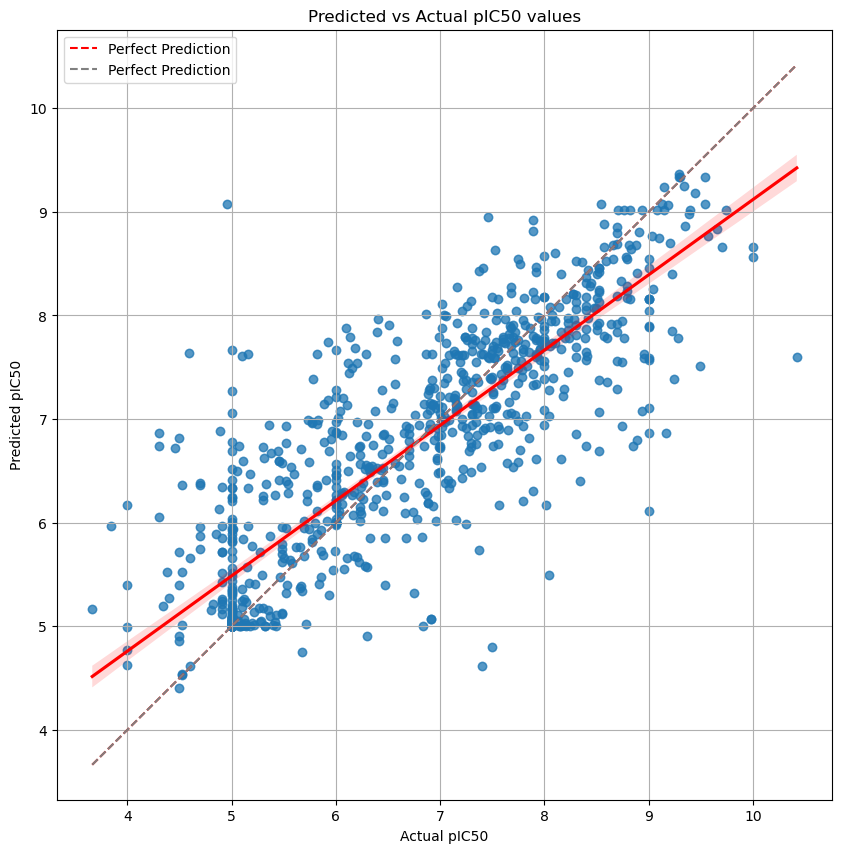

In [14]:

temp_df = pd.DataFrame({'Actual pIC50': y_test, 'Predicted pIC50': y_pred})

plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', label='Perfect Prediction')

# Use sns.regplot for the plt
sns.regplot(x='Actual pIC50', y='Predicted pIC50', data=temp_df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

# Add the perfect prediction line for reference
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], '--', color='grey', label='Perfect Prediction')


plt.title("Predicted vs Actual pIC50 values")

plt.legend() # display the label prediction
plt.grid(True) #grids just make the visualization easier.

plt.show()